In [218]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [219]:
#Reading the dataset
data=pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [220]:
data=data.drop(columns=['Id'])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [221]:
data.shape


(150, 5)

In [222]:
data['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [223]:
data.isnull().values.any()

False

<AxesSubplot:>

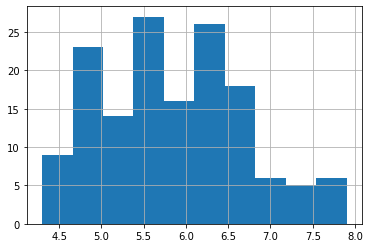

In [224]:
#Data Analysis
data['SepalLengthCm'].hist()


<AxesSubplot:>

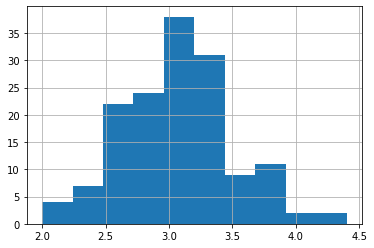

In [225]:
data['SepalWidthCm'].hist()


<AxesSubplot:>

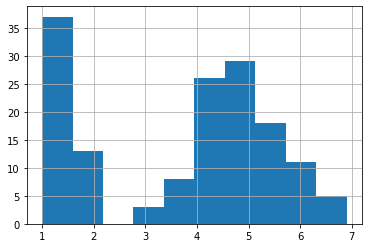

In [226]:
data['PetalLengthCm'].hist()

<AxesSubplot:>

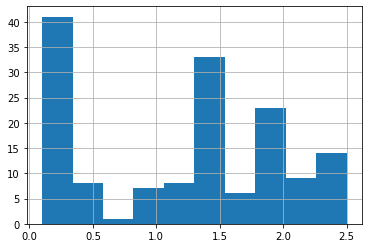

In [227]:
data['PetalWidthCm'].hist()

In [228]:
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

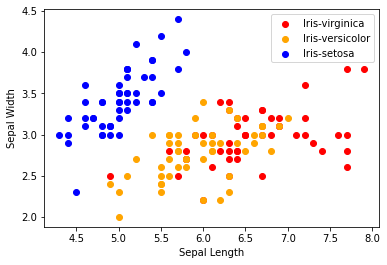

In [229]:
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

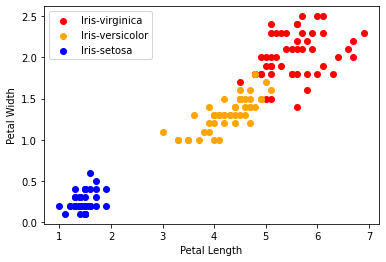

In [230]:
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

In [231]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


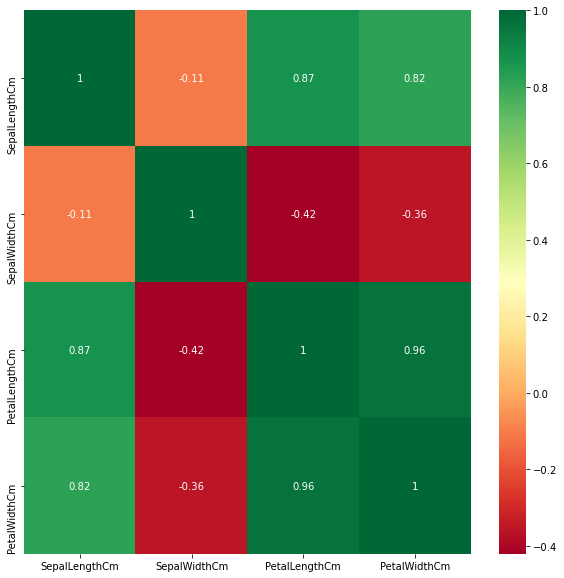

In [232]:
corrmat = data.corr()#coorelation
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [233]:
data['Species']= LabelEncoder().fit_transform(data['Species'])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [234]:
#Train teat split
x = data.drop(columns=['Species'])
y = data['Species']

x_train,x_test,y_train, y_test= train_test_split(x, y, test_size=0.25)

In [235]:
#Accuracy Score_Random forest classifier
random_forest_model = RandomForestClassifier()

random_forest_model.fit(x_train, y_train)

predictions_random_forest_model= random_forest_model.predict(x_test)

score=accuracy_score(y_test,predictions_random_forest_model)
score

0.9210526315789473

In [236]:
#Accuracy Score_K-nearest neighbours
k_neighbors_model = KNeighborsClassifier()

k_neighbors_model.fit(x_train, y_train)

predictions_k_neighbors_model= k_neighbors_model.predict(x_test)

score=accuracy_score(y_test,predictions_k_neighbors_model)
print(score)

0.9736842105263158


In [237]:
#Accuracy Score_Decision tree classifier
decision_tree_model = DecisionTreeClassifier()

decision_tree_model.fit(x_train, y_train)

predictions_decision_tree_model= decision_tree_model.predict(x_test)

score=accuracy_score(y_test,predictions_decision_tree_model)
print(score)

0.9473684210526315


In [238]:
#Confusion matrix_Random forest classifier
confusion_matrix(y_test, predictions_random_forest_model)

array([[14,  0,  0],
       [ 0,  9,  0],
       [ 0,  3, 12]], dtype=int64)

In [239]:
#Confusion matrix_K-nearest neighbours
confusion_matrix(y_test, predictions_k_neighbors_model)

array([[14,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 14]], dtype=int64)

In [240]:
#Confusion matrix_Decision tree classifier
confusion_matrix(y_test, predictions_decision_tree_model)

array([[14,  0,  0],
       [ 0,  9,  0],
       [ 0,  2, 13]], dtype=int64)